# Applications of Python: Intro to Machine Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Imports for perceptron.
from sklearn.linear_model import Perceptron
from mlxtend.plotting import plot_decision_regions

## Multiclass Perceptron

Description: Programming in the Sky Workshop 2018 - Advanced Python
Session (Applications of Python: Machine Learning).

### Overview of Project:

Part A  
- Load in the data set data0.txt. This has 2-d data in four classes (coded as 0,1,2,3). Each row consists of three numbers: the two coordinates of the data points and the label.

Part B
-  Run the multiclass Perceptron algorithm to learn a classifier.
- Create a plot that shows all the data points (with different colors and shapes for different labels) as well as the decision region.

### Helper functions

**Label pseudo-code**  

$\texttt{routine label(w, b, x)}$  
$\quad\texttt{Create an array to store the results of each dot product.}$  
$\quad\texttt{Loop through w and b (i.e. with j as your counter)}$  
$\quad \quad\texttt{Calculate } w_j \cdot x + b_j \texttt{, and record the result.}$  
$\quad\texttt{Return the index of the largest result.}$  

In [2]:
def label(w, b, x):
    """Label the datapoint x using the learned weights and biases.
    
    Parameters: 
        w is a k-dimensional vector of d-dimensional vectors
        b is a k-dimensional vector of scalar terms
     
    Returns: On instance x, predict label arg maxj (wj · x + bj )
    """
    results = np.zeros(len(w))
    for i in range(len(w)):
        results[i] = w[i].dot(x) + b[i]
    return np.argmax(results)

**Perceptron pseudo-code**

```
1) Initialize k w-vectors in d-dimensions and k b-values to 0
2) Loop through the entire data set while some training point(x, y), i.e. (data point, label) is misclassified.
    a) Predict a data point x using w and b (call your label function).
    b) Check if the prediction matches the actual label. If so, do nothing. If not:
        b.a) for the correct label y:
        - w[y] = w[y] + x
        - b[y] = b[y] + 1
        for incorrect label y_:
            - w[y_] = w[y_] - x
            - b[y_] = b[y_] - 1
```

In [3]:
def multi_perceptron(data, labels):
    """
    Setting: X = Rd and Y = {1,2,...,k}
    Model: w1,...,wk ∈ Rd and b1,...,bk ∈ R
    Description: Creates a multi-class Perceptron model.
    """
    # Get data dimensions d and number of classes k
    d = len(data[0])
    k = len(np.unique(labels))

    # Model: w1,...,wk ∈ Rd and b1,...,bk ∈ R
    # Initialize k w-vectors in d-dimensions and k b-values
    w = np.zeros(d)
    w = [w for i in range(k)]
    b = np.zeros(k)

    # Repeat while some training point (x,y) is misclassified:
    idx_arr = list(range(len(data)))
    changed = True
    while changed != False:
        changed = False
        random.shuffle(idx_arr)
        for i in idx_arr:
            predict = label(w, b, data[i])
            actual = labels[i]
            if predict != actual:
                # for correct label y:
                w[actual] = w[actual] + data[i]
                b[actual] = b[actual] + 1 
                # for predicted label y:
                w[predict] = w[predict] - data[i]
                b[predict] = b[predict] - 1 
                changed = True

    return w, b

### Main Program Driver

In [4]:
# Read in a file to classify.
input_data = np.loadtxt('data0.txt')

/Users/David/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/David/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


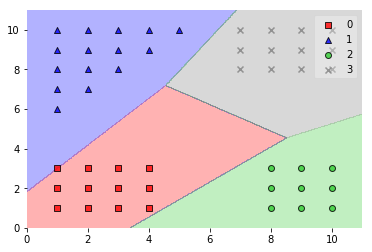

In [5]:
##############################################################################
# Main program. Do NOT edit any code in this cell.
##############################################################################
data = input_data[:, [0, 1]].astype(int)
labels = input_data[:, 2].astype(int)

# Run the multiclass perceptron algorithm
w, b = multi_perceptron(data, labels)

# Plot the decision boundaries (fit something random so it's happy)
clf_m = Perceptron()
clf_m.fit(np.random.randint(2, size=(4, 2)), np.arange(0, 4).reshape(4, 1))

# Use the w & b calculated coefficients
clf_m.coef_ = np.asarray(w)
clf_m.intercept_ = b

# Plot the result
plot_decision_regions(data, labels, clf_m)
plt.show()